# 2 - Practice Problems & Real-World Applications

**Goal:** Apply descriptive statistics to real-world scenarios

- Understand when to use which metric
- Extract business insights from data
- Compare datasets like a professional analyst

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set_style("whitegrid")
print("✓ All libraries loaded successfully!")

✓ All libraries loaded successfully!


---

## PROBLEM SET 1: Basic Calculations with Heights Data

**Dataset:** Heights (cm) of 12 students

`[165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171]`

In [3]:
# Create the heights dataset
heights = [165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171]
heights_series = pd.Series(heights)

print("Heights (cm):", heights)
print(f"Number of students: {len(heights)}")
print(f"Sorted: {sorted(heights)}")

Heights (cm): [165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171]
Number of students: 12
Sorted: [165, 166, 167, 168, 169, 169, 170, 171, 171, 172, 173, 174]


### Problem 1.1: Calculate Mean Height

**Question:** What's the average height of these students?

In [4]:
# Solution
mean_height = heights_series.mean()

print(f"Mean height: {mean_height:.2f} cm")
print(f"\nManual calculation: {sum(heights)} / {len(heights)} = {sum(heights)/len(heights):.2f} cm")
print(f"\nInterpretation: On average, students are {mean_height:.1f} cm tall")

Mean height: 169.58 cm

Manual calculation: 2035 / 12 = 169.58 cm

Interpretation: On average, students are 169.6 cm tall


### Problem 1.2: Calculate Median Height

**Question:** What's the middle height when students are lined up by height?

In [5]:
# Solution
median_height = heights_series.median()
sorted_heights = sorted(heights)

print(f"Sorted heights: {sorted_heights}")
print(f"\nMiddle two values (6th and 7th): {sorted_heights[5]} and {sorted_heights[6]}")
print(f"Median = ({sorted_heights[5]} + {sorted_heights[6]}) / 2 = {median_height:.1f} cm")
print(f"\nInterpretation: Half the students are below {median_height:.1f} cm, half are above")

Sorted heights: [165, 166, 167, 168, 169, 169, 170, 171, 171, 172, 173, 174]

Middle two values (6th and 7th): 169 and 170
Median = (169 + 170) / 2 = 169.5 cm

Interpretation: Half the students are below 169.5 cm, half are above


### Problem 1.3: Find the Mode

**Question:** Which height appears most frequently?

In [9]:
# Solution
mode_height = heights_series.mode()

print("Height frequency:")
print(heights_series.value_counts().sort_index())
print(f"\nModes (most frequent heights): {mode_height.tolist()}")
print(f"\nInterpretation: Both {mode_height[0]} cm and {mode_height[1]} cm appear twice")
print("This is called BIMODAL distribution (two modes)")

Height frequency:
165    1
166    1
167    1
168    1
169    2
170    1
171    2
172    1
173    1
174    1
Name: count, dtype: int64

Modes (most frequent heights): [169, 171]

Interpretation: Both 169 cm and 171 cm appear twice
This is called BIMODAL distribution (two modes)


### Problem 1.4: Calculate Range

**Question:** What's the spread between shortest and tallest?

In [10]:
# Solution
min_height = heights_series.min()
max_height = heights_series.max()
range_height = max_height - min_height

print(f"Minimum height: {min_height} cm")
print(f"Maximum height: {max_height} cm")
print(f"Range: {max_height} - {min_height} = {range_height} cm")
print(f"\nInterpretation: Heights vary by {range_height} cm")
print("This is a small range, so heights are fairly consistent")

Minimum height: 165 cm
Maximum height: 174 cm
Range: 174 - 165 = 9 cm

Interpretation: Heights vary by 9 cm
This is a small range, so heights are fairly consistent


### Problem 1.5: Calculate Standard Deviation

**Question:** How much do heights typically vary from the average?

In [11]:
# Solution
std_height = heights_series.std()
var_height = heights_series.var()

print(f"Variance: {var_height:.2f}")
print(f"Standard Deviation: {std_height:.2f} cm")
print(f"\nInterpretation:")
print(f"- On average, heights deviate from mean ({mean_height:.1f} cm) by {std_height:.1f} cm")
print(f"- Range from {mean_height - std_height:.1f} cm to {mean_height + std_height:.1f} cm covers ~68% of students")
print(f"\nThis is a SMALL std dev, so heights are very consistent")

Variance: 7.72
Standard Deviation: 2.78 cm

Interpretation:
- On average, heights deviate from mean (169.6 cm) by 2.8 cm
- Range from 166.8 cm to 172.4 cm covers ~68% of students

This is a SMALL std dev, so heights are very consistent


### Problem 1.6: Find Quartiles (Q1, Q2, Q3)

**Question:** If you divide students into 4 groups by height, where are the boundaries?

In [12]:
# Solution
Q1 = heights_series.quantile(0.25)
Q2 = heights_series.quantile(0.50)  # Same as median
Q3 = heights_series.quantile(0.75)

print(f"Q1 (25th percentile): {Q1:.1f} cm - 25% of students below this")
print(f"Q2 (50th percentile): {Q2:.1f} cm - This is the MEDIAN")
print(f"Q3 (75th percentile): {Q3:.1f} cm - 75% of students below this")
print(f"\nInterpretation:")
print(f"- Shortest 25% are below {Q1:.0f} cm")
print(f"- Middle 50% are between {Q1:.0f} and {Q3:.0f} cm")
print(f"- Tallest 25% are above {Q3:.0f} cm")

Q1 (25th percentile): 167.8 cm - 25% of students below this
Q2 (50th percentile): 169.5 cm - This is the MEDIAN
Q3 (75th percentile): 171.2 cm - 75% of students below this

Interpretation:
- Shortest 25% are below 168 cm
- Middle 50% are between 168 and 171 cm
- Tallest 25% are above 171 cm


### Problem 1.7: Calculate IQR (Interquartile Range)

**Question:** What's the spread of the middle 50% of heights?

In [13]:
# Solution
IQR = Q3 - Q1

print(f"IQR = Q3 - Q1 = {Q3:.1f} - {Q1:.1f} = {IQR:.1f} cm")
print(f"\nInterpretation:")
print(f"The middle 50% of heights span {IQR:.1f} cm")
print(f"This is a TIGHT spread, meaning most students have similar heights")

IQR = Q3 - Q1 = 171.2 - 167.8 = 3.5 cm

Interpretation:
The middle 50% of heights span 3.5 cm
This is a TIGHT spread, meaning most students have similar heights


### Problem 1.8: Detect Outliers Using IQR Method

**Question:** If we add an unusually short student (130 cm), is this an outlier?

In [14]:
# Solution
heights_with_outlier = [165, 172, 168, 171, 169, 174, 166, 170, 173, 167, 169, 171, 130]
hs = pd.Series(heights_with_outlier)

Q1_new = hs.quantile(0.25)
Q3_new = hs.quantile(0.75)
IQR_new = Q3_new - Q1_new

lower_bound = Q1_new - 1.5 * IQR_new
upper_bound = Q3_new + 1.5 * IQR_new

print(f"With outlier added:")
print(f"Q1: {Q1_new:.1f}, Q3: {Q3_new:.1f}, IQR: {IQR_new:.1f}")
print(f"\nOutlier thresholds:")
print(f"Lower bound: {Q1_new:.1f} - 1.5 × {IQR_new:.1f} = {lower_bound:.1f}")
print(f"Upper bound: {Q3_new:.1f} + 1.5 × {IQR_new:.1f} = {upper_bound:.1f}")
print(f"\nAny value below {lower_bound:.1f} or above {upper_bound:.1f} is an OUTLIER")

outliers = hs[(hs < lower_bound) | (hs > upper_bound)]
print(f"\nOutliers detected: {outliers.tolist()}")
print(f"\n✓ YES! 130 cm is an outlier (unusually short)")

With outlier added:
Q1: 167.0, Q3: 171.0, IQR: 4.0

Outlier thresholds:
Lower bound: 167.0 - 1.5 × 4.0 = 161.0
Upper bound: 171.0 + 1.5 × 4.0 = 177.0

Any value below 161.0 or above 177.0 is an OUTLIER

Outliers detected: [130]

✓ YES! 130 cm is an outlier (unusually short)


### Problem Set 1 Summary

All statistics for heights dataset:

In [15]:
print("\n" + "="*60)
print("PROBLEM SET 1 - COMPLETE SUMMARY")
print("="*60)
print(f"Mean:          {mean_height:.2f} cm")
print(f"Median:        {median_height:.2f} cm")
print(f"Mode:          {mode_height.tolist()}")
print(f"Range:         {range_height} cm")
print(f"Variance:      {var_height:.2f}")
print(f"Std Deviation: {std_height:.2f} cm")
print(f"Q1:            {Q1:.2f} cm")
print(f"Q3:            {Q3:.2f} cm")
print(f"IQR:           {IQR:.2f} cm")
print("="*60)
print("\nKey Insight: This group has very CONSISTENT heights")
print(f"(Low std dev of {std_height:.1f} cm means heights cluster together)")


PROBLEM SET 1 - COMPLETE SUMMARY
Mean:          169.58 cm
Median:        169.50 cm
Mode:          [169, 171]
Range:         9 cm
Variance:      7.72
Std Deviation: 2.78 cm
Q1:            167.75 cm
Q3:            171.25 cm
IQR:           3.50 cm

Key Insight: This group has very CONSISTENT heights
(Low std dev of 2.8 cm means heights cluster together)


---

## PROBLEM SET 2: Comparative Analysis

**Scenario:** Two classes took the same test. Which class performed better?

**Class A Scores:** `[75, 78, 82, 80, 76, 85, 81, 79, 77, 83]`
**Class B Scores:** `[45, 50, 95, 88, 52, 98, 100, 40, 60, 72]`

In [16]:
# Create datasets
class_a = pd.Series([75, 78, 82, 80, 76, 85, 81, 79, 77, 83])
class_b = pd.Series([45, 50, 95, 88, 52, 98, 100, 40, 60, 72])

print("Class A Scores:", class_a.tolist())
print("Class B Scores:", class_b.tolist())

Class A Scores: [75, 78, 82, 80, 76, 85, 81, 79, 77, 83]
Class B Scores: [45, 50, 95, 88, 52, 98, 100, 40, 60, 72]


### Problem 2.1: Which class has higher average?

In [17]:
mean_a = class_a.mean()
mean_b = class_b.mean()

print(f"Class A Mean: {mean_a:.1f}")
print(f"Class B Mean: {mean_b:.1f}")
print(f"\nDifference: {mean_a - mean_b:.1f} points")
print(f"\n✓ Class A has higher average (by {mean_a - mean_b:.1f} points)")

Class A Mean: 79.6
Class B Mean: 70.0

Difference: 9.6 points

✓ Class A has higher average (by 9.6 points)


### Problem 2.2: Which class has more consistent scores?

In [18]:
std_a = class_a.std()
std_b = class_b.std()

print(f"Class A Std Dev: {std_a:.2f}")
print(f"Class B Std Dev: {std_b:.2f}")
print(f"\nDifference: {std_b - std_a:.2f} points")
print(f"\nInterpretation:")
print(f"- Class A: Scores cluster tightly (std dev {std_a:.1f})")
print(f"  Most scores between {mean_a - std_a:.0f} and {mean_a + std_a:.0f}")
print(f"\n- Class B: Scores spread widely (std dev {std_b:.1f})")
print(f"  Some students got 40, others got 100!")
print(f"\n✓ Class A is MUCH more consistent")

Class A Std Dev: 3.20
Class B Std Dev: 23.54

Difference: 20.33 points

Interpretation:
- Class A: Scores cluster tightly (std dev 3.2)
  Most scores between 76 and 83

- Class B: Scores spread widely (std dev 23.5)
  Some students got 40, others got 100!

✓ Class A is MUCH more consistent


### Problem 2.3: Which class would you recommend?

In [19]:
# Create comparison
comparison = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Range'],
    'Class A': [
        f"{class_a.mean():.1f}",
        f"{class_a.median():.1f}",
        f"{class_a.std():.2f}",
        f"{class_a.min()}",
        f"{class_a.max()}",
        f"{class_a.max() - class_a.min()}"
    ],
    'Class B': [
        f"{class_b.mean():.1f}",
        f"{class_b.median():.1f}",
        f"{class_b.std():.2f}",
        f"{class_b.min()}",
        f"{class_b.max()}",
        f"{class_b.max() - class_b.min()}"
    ]
})

print(comparison.to_string(index=False))
print("\n" + "="*60)
print("VERDICT:")
print("="*60)
print("\n✓ Class A is BETTER because:")
print(f"  1. Higher average ({mean_a:.1f} vs {mean_b:.1f})")
print(f"  2. More consistent (std dev {std_a:.1f} vs {std_b:.1f})")
print(f"  3. Narrower range ({class_a.max() - class_a.min()} vs {class_b.max() - class_b.min()})")
print("\n✗ Class B problems:")
print(f"  - Some students completely failed (score 40)")
print(f"  - High variability indicates mixed teaching/understanding")
print(f"  - Unpredictable performance")
print("\nConclusion: Class A is more reliable and higher-performing!")

 Metric Class A Class B
   Mean    79.6    70.0
 Median    79.5    66.0
Std Dev    3.20   23.54
    Min      75      40
    Max      85     100
  Range      10      60

VERDICT:

✓ Class A is BETTER because:
  1. Higher average (79.6 vs 70.0)
  2. More consistent (std dev 3.2 vs 23.5)
  3. Narrower range (10 vs 60)

✗ Class B problems:
  - Some students completely failed (score 40)
  - High variability indicates mixed teaching/understanding
  - Unpredictable performance

Conclusion: Class A is more reliable and higher-performing!


### Visualization: Class Comparison

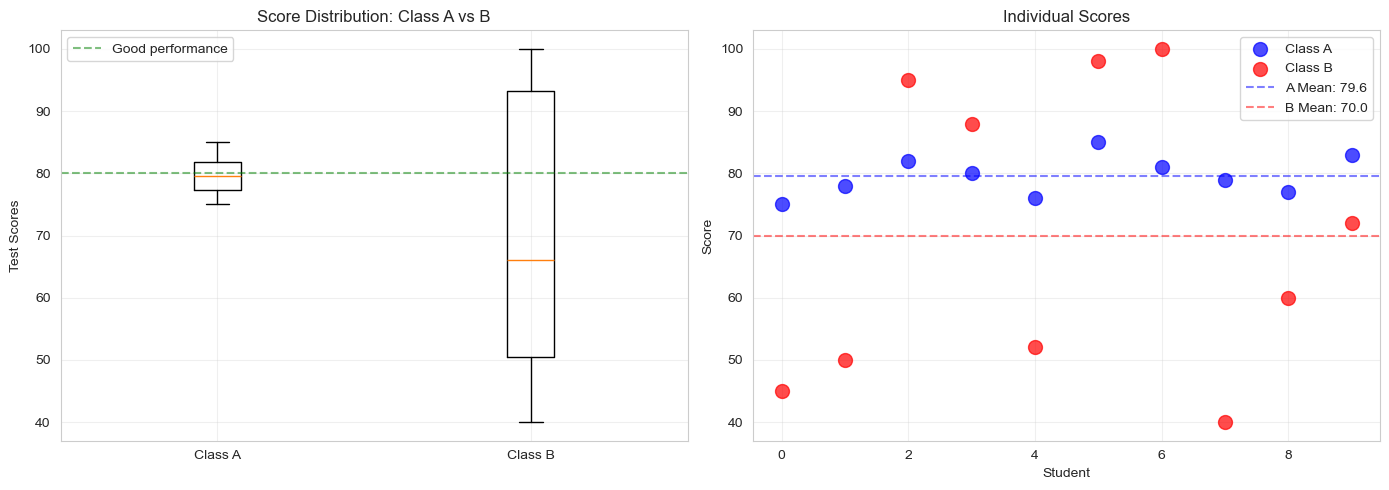

Chart saved as 'class_comparison.png'


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplots
data_to_plot = [class_a, class_b]
axes[0].boxplot(data_to_plot, tick_labels=['Class A', 'Class B'])
axes[0].set_ylabel('Test Scores')
axes[0].set_title('Score Distribution: Class A vs B')
axes[0].grid(alpha=0.3)
axes[0].axhline(y=80, color='green', linestyle='--', alpha=0.5, label='Good performance')
axes[0].legend()

# Scatter plots
axes[1].scatter(range(len(class_a)), class_a, s=100, alpha=0.7, label='Class A', color='blue')
axes[1].scatter(range(len(class_b)), class_b, s=100, alpha=0.7, label='Class B', color='red')
axes[1].axhline(y=mean_a, color='blue', linestyle='--', alpha=0.5, label=f'A Mean: {mean_a:.1f}')
axes[1].axhline(y=mean_b, color='red', linestyle='--', alpha=0.5, label=f'B Mean: {mean_b:.1f}')
axes[1].set_xlabel('Student')
axes[1].set_ylabel('Score')
axes[1].set_title('Individual Scores')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('class_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

print("Chart saved as 'class_comparison.png'")